In [2]:
import os
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fastai import *
from fastai.vision import *

In [10]:
bs=16

In [38]:
path = Path(os.path.join(os.getcwd()))

In [8]:
path_train = path/'train'
path_valid = path/'valid'

In [22]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (24 items)
x: ImageItemList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
football,football,football,football,football
Path: /Users/patrickcullinane/Documents/Code/football_or_rugby;

Valid: LabelList (6 items)
x: ImageItemList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
football,football,football,rugby,rugby
Path: /Users/patrickcullinane/Documents/Code/football_or_rugby;

Test: None

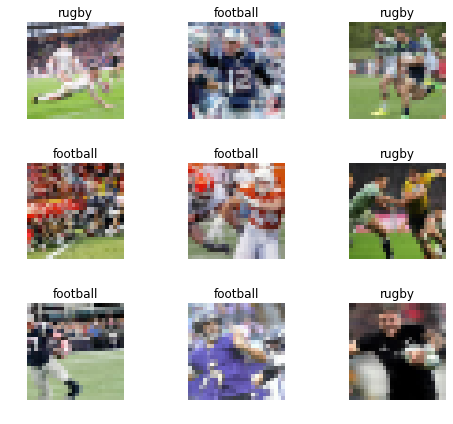

In [24]:
data.show_batch(rows=3, figsize=(7,6))

In [25]:
print(data.classes)
len(data.classes),data.c

['football', 'rugby']


(2, 2)

In [15]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [26]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate
1,0.180052,0.329333,0.000000
2,0.503551,0.354918,0.166667
3,0.405388,0.342998,0.166667
4,0.347062,0.339710,0.166667
5,0.394269,0.317748,0.000000
6,0.403116,0.309037,0.000000
7,0.363491,0.298653,0.000000
8,0.373689,0.302054,0.000000
9,0.363217,0.295363,0.000000
10,0.362951,0.336543,0.000000


In [18]:
learn.save('stage-1') # saving the model weights


In [19]:
learn.load('stage-1') # loading the model weights

Learner(data=ImageDataBunch;

Train: LabelList (24 items)
x: ImageItemList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
football,football,football,football,football
Path: /Users/patrickcullinane/Documents/Code/football_or_rugby;

Valid: LabelList (6 items)
x: ImageItemList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
football,football,football,rugby,rugby
Path: /Users/patrickcullinane/Documents/Code/football_or_rugby;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

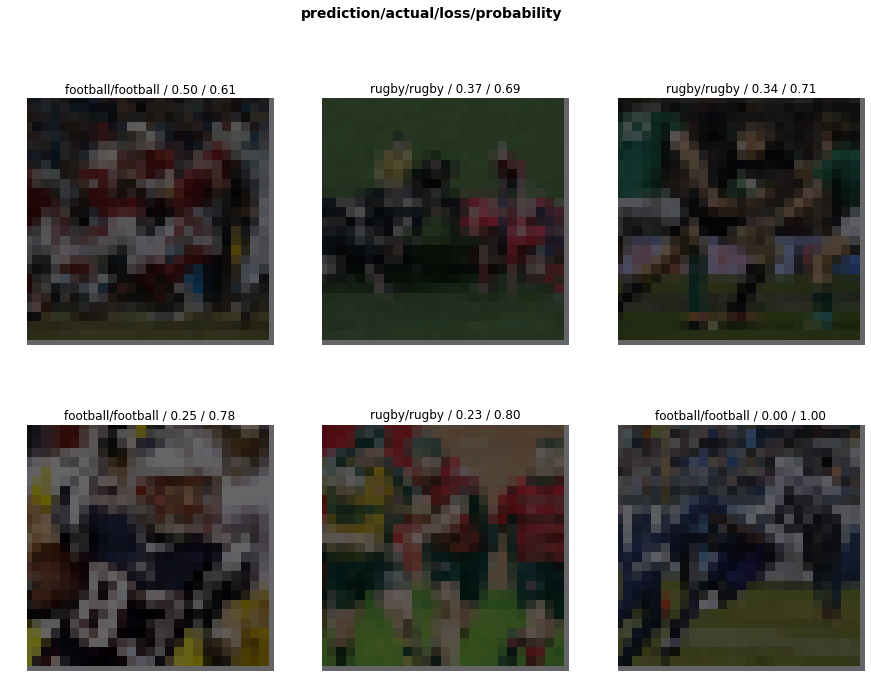

In [33]:
interp.plot_top_losses(6, figsize=(15,11))

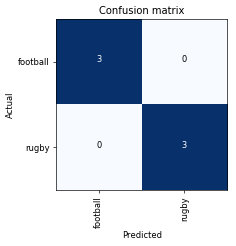

In [37]:
interp.plot_confusion_matrix(dpi=60)

In [39]:
interp.most_confused(min_val=2)

[]